<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import display

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Чтобы результат выполнения некоторых функций (которые, как правило, используют случайные числа) был тем не менее детерменированным`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [74]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [75]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [76]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [77]:
n_a_cols = df_train.isna().any().loc[lambda x: x].index
print('N/A cols', n_a_cols)

N/A cols Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


In [78]:
missing_train = df_train.isnull().sum()
missing_train[missing_train > 0]

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


In [79]:
missing_test = df_test.isnull().sum()
missing_test[missing_test > 0]

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


In [80]:
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

**`Здесь я сначала выполнил действия заданий 4 и 5, чтобы получить числовые признаки и брать медиану по ним + сразу удаляется 'torque'`**

Дробные признаки: 'mileage', 'engine', 'max_power'

In [81]:
unit_value_raw_cols = ['mileage', 'engine', 'max_power']

def extract_value_from_unit_value(value):
  if value is None:
    return value
  if isinstance(value, float):
    return value
  splited = value.strip().split()
  if len(splited) == 1:
    return 0
  return float(splited[0])

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

class ValueFromValueUnitExtractor(BaseEstimator, TransformerMixin):
  def __init__(self, raw_cols: list[str]):
    self.medians = {}
    self.raw_cols = raw_cols

  def fit(self, X, y = None):
    for col in self.raw_cols:
      self.medians[col] = X[X[col].notna()][col].map(extract_value_from_unit_value).median()

  def transform(self, X):
    for col in self.raw_cols:
      medians = self.medians[col]
      X[col] = X[col].fillna(medians)
      X[col] = X[col].map(extract_value_from_unit_value).astype(float)
    return X

In [83]:
value_unit_extractor = ValueFromValueUnitExtractor(unit_value_raw_cols)
value_unit_extractor.fit(df_train)
df_train = value_unit_extractor.transform(df_train)
df_test = value_unit_extractor.transform(df_test)

Целочисленные признаки: 'engine', 'seats'

In [84]:
int_feature_raw_cols = ['engine', 'seats']

def convert_to_int_feature(value):
  if value is None:
    return value
  return int(value)

In [85]:
class IntFeatureExtractor(BaseEstimator, TransformerMixin):
  def __init__(self, raw_cols: list[str]):
    self.medians = {}
    self.raw_cols = raw_cols

  def fit(self, X, y = None):
    for col in self.raw_cols:
      self.medians[col] = X[X[col].notna()][col].map(convert_to_int_feature).median()

  def transform(self, X):
    for col in self.raw_cols:
      medians = self.medians[col]
      X[col] = X[col].fillna(medians)
      X[col] = X[col].map(convert_to_int_feature).astype(int)
    return X

In [86]:
int_feature_extractor = IntFeatureExtractor(int_feature_raw_cols)
int_feature_extractor.fit(df_train)
df_train = int_feature_extractor.transform(df_train)
df_test = int_feature_extractor.transform(df_test)

Удалим torque

In [87]:
from sklearn.pipeline import FunctionTransformer

class ColumnRemover(FunctionTransformer):
  def __init__(self, column_names: list[str]):
    self.column_names = column_names
    super().__init__(self._drop)

  def _drop(self, X):
    return X.drop(self.column_names, axis=1)

In [88]:
torque_remover = ColumnRemover(["torque"])
df_train = torque_remover.transform(df_train)
df_test = torque_remover.transform(df_test)

Проверим типы

In [89]:
print("Train dtypes\n", df_train.dtypes, sep='')
print()
print("Test dtypes\n", df_test.dtypes, sep='')
pd.concat([df_train.head(5), df_test.head(5)])

Train dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Test dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5


In [90]:
print("Пропуски в train:\n", df_train.isnull().sum(), sep='')
print()
print("Пропуски в test:\n", df_test.isnull().sum(), sep='')

Пропуски в train:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Пропуски в test:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [91]:
target_col = 'selling_price'

In [92]:
features = df_train.columns.difference([target_col])
duplicates_mask = df_train.duplicated(subset=features, keep=False)
num_duplicates = duplicates_mask.sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 1799


In [93]:
df_train[duplicates_mask].sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968,188.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5


In [94]:
df_train = df_train.drop_duplicates(subset=features, keep='first')

In [95]:
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [96]:
# Поправил assert с учетом того что 'torque' удален
assert df_train.shape == (5840, 12)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

**`Было сделано в задании 1`**

In [97]:
print("Train dtypes\n", df_train.dtypes, sep='')
print()
print("Test dtypes\n", df_test.dtypes, sep='')
pd.concat([df_train.head(5), df_test.head(5)])

Train dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Test dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

**`Было сделано в задании 1`**

In [98]:
print("Train dtypes\n", df_train.dtypes, sep='')
print()
print("Test dtypes\n", df_test.dtypes, sep='')
pd.concat([df_train.head(5), df_test.head(5)])

Train dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Test dtypes
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [99]:
for name, df in {'train': df_train, 'test': df_test}.items():
  print(f"Статистики для числовых столбцов ({name}):")
  display(df.describe())
  print(f"Статистики для категориальных столбцов ({name}):")
  display(df.describe(include=['O']))

Статистики для числовых столбцов (train):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.896741,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.660396,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Статистики для категориальных столбцов (train):


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Статистики для числовых столбцов (test):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Статистики для категориальных столбцов (test):


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [100]:
# Тут заменил 13 на 12, т.к. столбец torque удалили
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [101]:
numerical_features = df_train.select_dtypes(include=[float, int]).columns
test_numerical_features = df_test.select_dtypes(include=[float, int]).columns
# На всякий случай убедимся что признаки в train и test совпадают
assert (numerical_features.values == test_numerical_features.values).all()

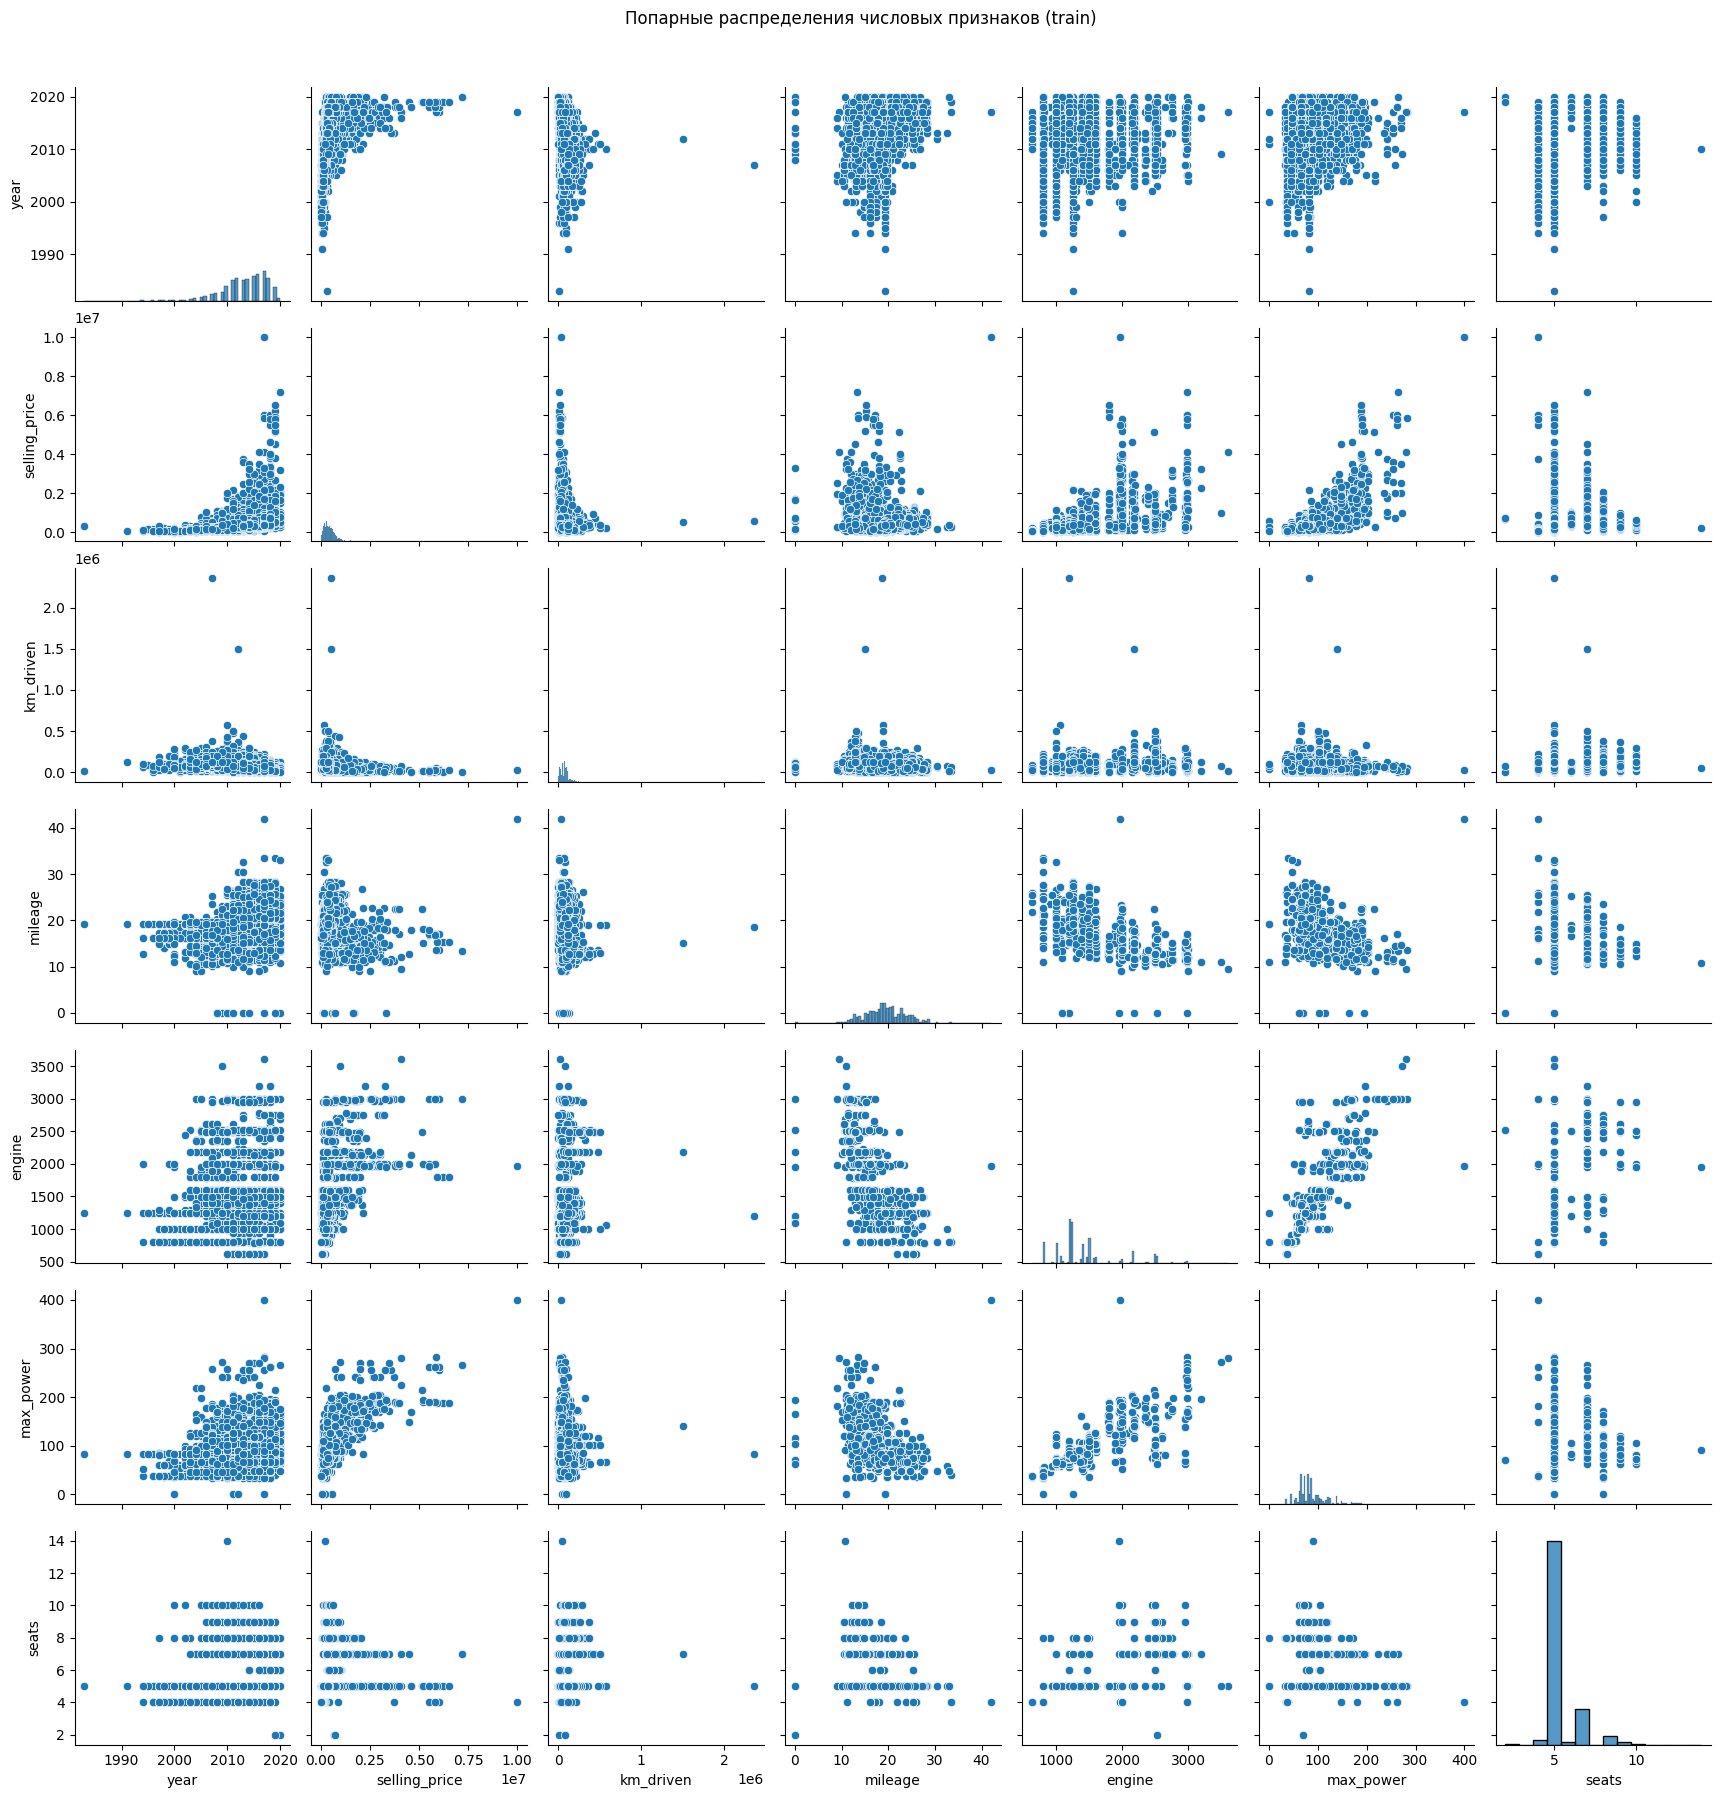

In [102]:
sns.pairplot(df_train[numerical_features])
plt.suptitle('Попарные распределения числовых признаков (train)', y=1.03)
plt.show()

- Можно ли предположить на основе распределений связь признаков с целевой переменной?
  - `Поскольку на графиках year/selling_price, max_power/selling_price, возможно selling_price зависит от года производства и от макс. мощи движка.`

- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
  - `У engine/max_power тоже можно усмотреть линейную зависимость. Вероятно, макс. мощность зависит от размера движка (может показаться очевидным).`

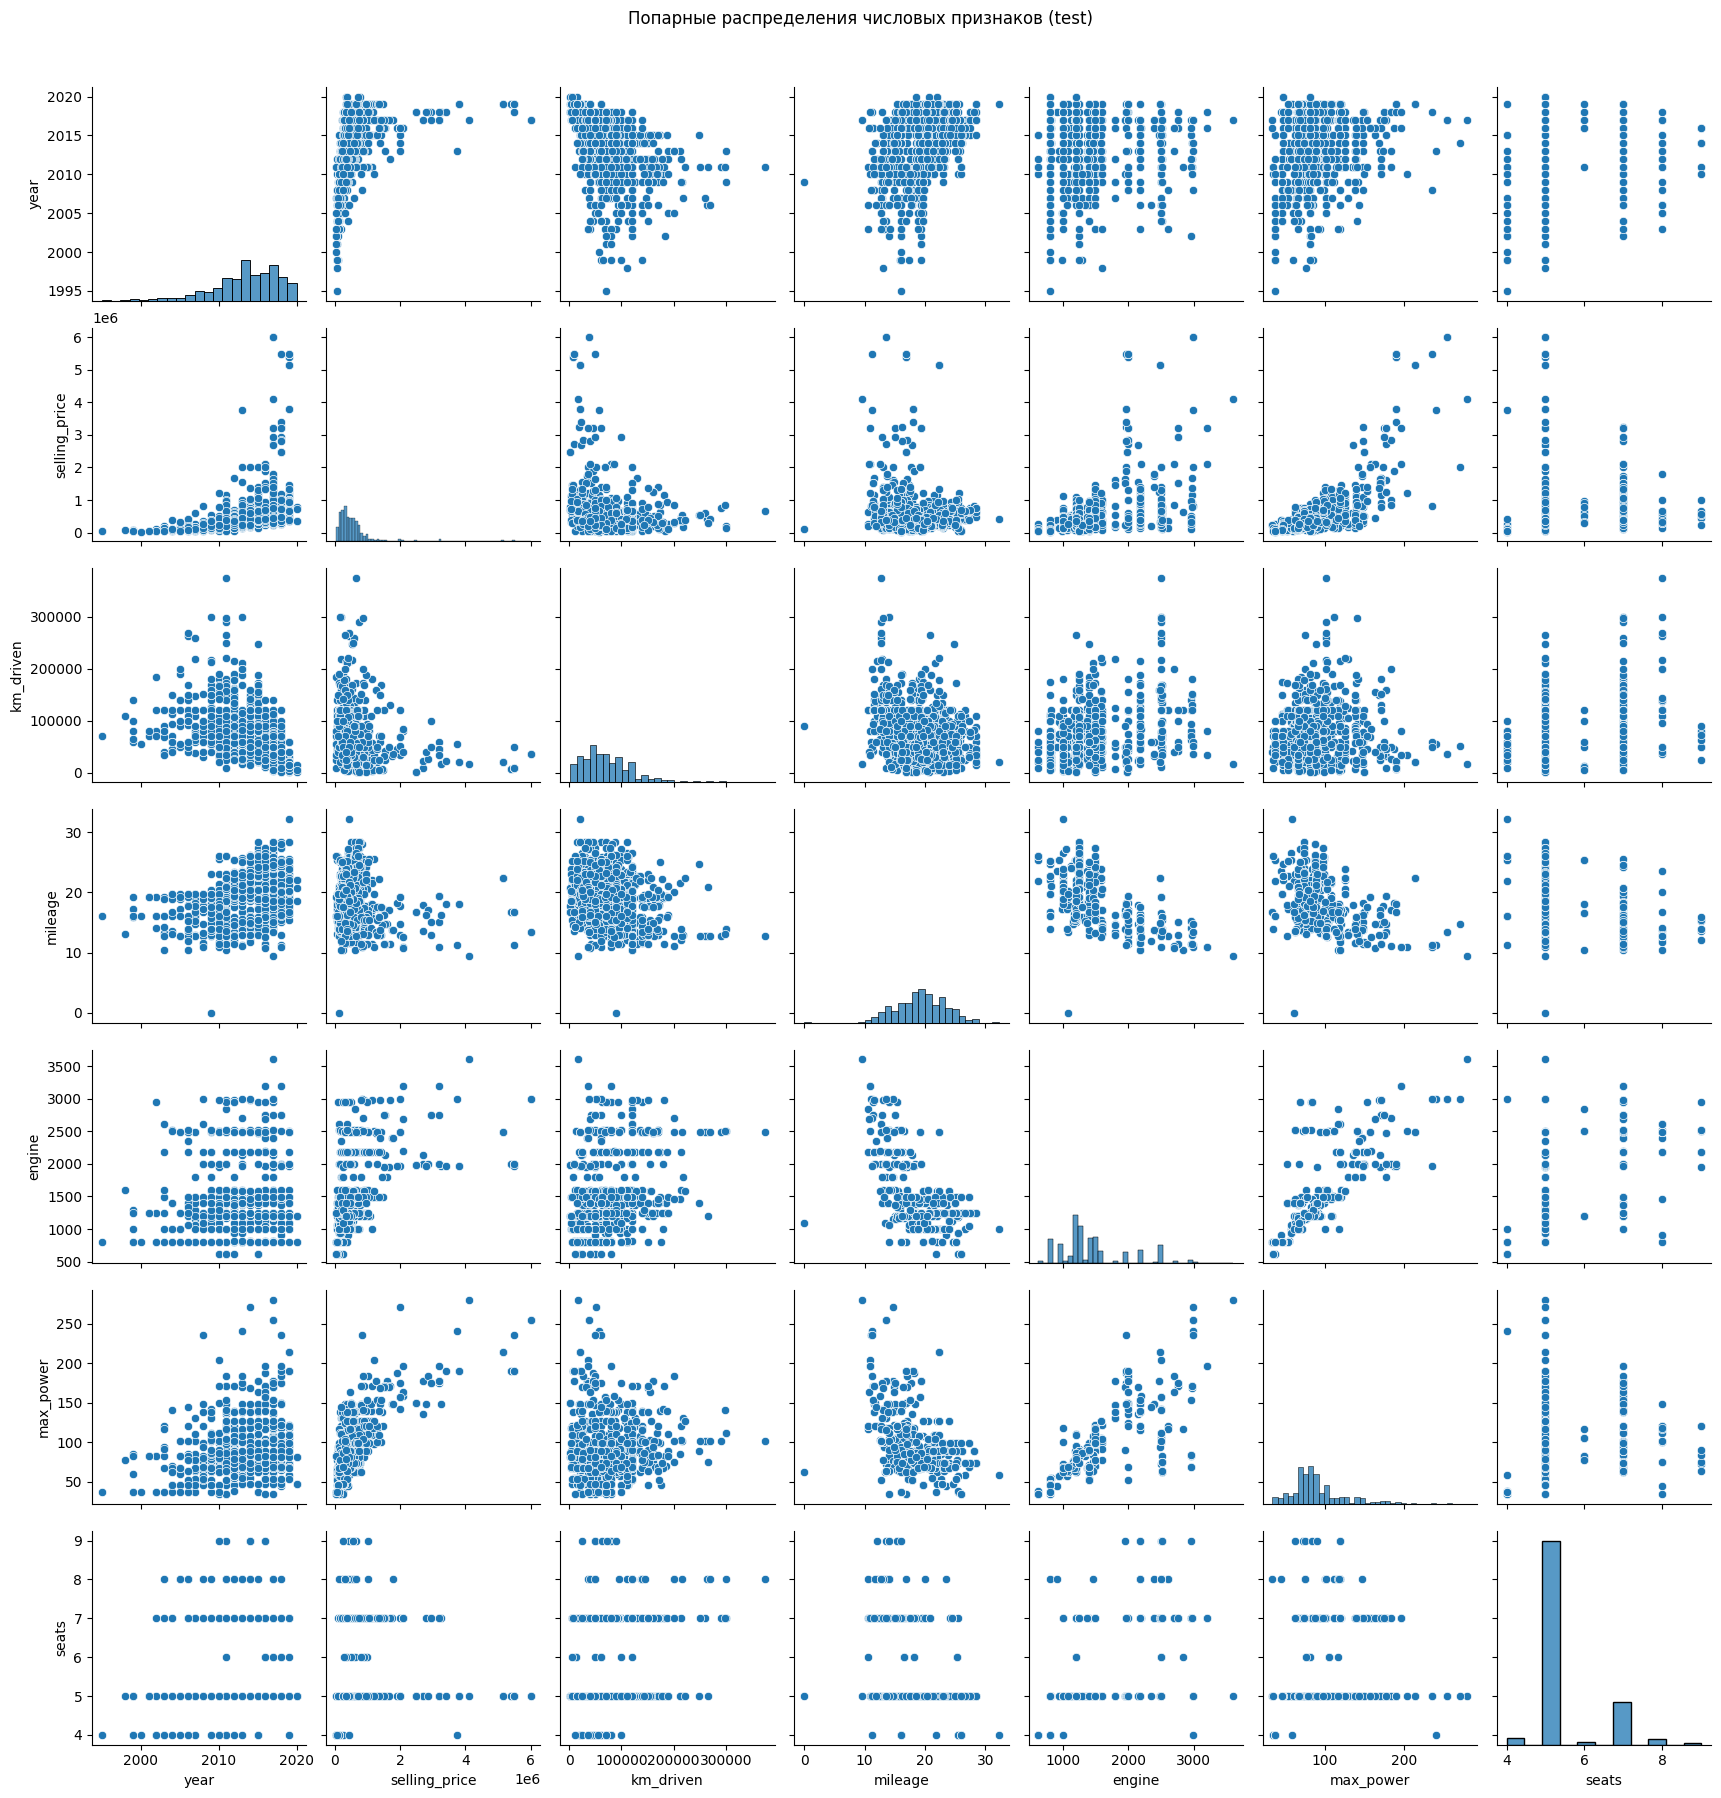

In [103]:
sns.pairplot(df_test[numerical_features])
plt.suptitle('Попарные распределения числовых признаков (test)', y=1.03)
plt.show()

- Похожими ли оказались совокупности при разделении на трейн и тест?
  - `Да, усмотренные в train закономерности прослеживаются и в тесте`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [104]:
test_corr = df_test[numerical_features].corr()
test_corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.416422,-0.469142,0.341842,0.013145,0.228991,0.019283
selling_price,0.416422,1.000000,-0.235824,-0.150103,0.468086,0.750928,0.086948
km_driven,-0.469142,-0.235824,1.000000,-0.257246,0.289379,0.022857,0.286780
mileage,0.341842,-0.150103,-0.257246,1.000000,-0.601678,-0.404634,-0.473993
engine,0.013145,0.468086,0.289379,-0.601678,1.000000,0.726937,0.634820
max_power,0.228991,0.750928,0.022857,-0.404634,0.726937,1.000000,0.262950
seats,0.019283,0.086948,0.286780,-0.473993,0.634820,0.262950,1.000000


<Axes: >

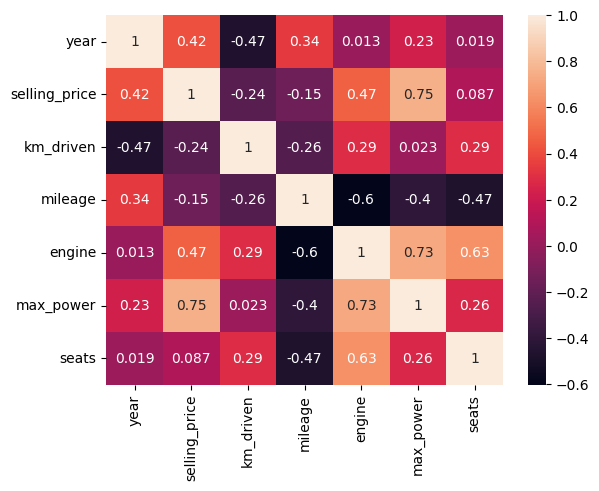

In [105]:
sns.heatmap(test_corr, annot=True,)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

 - Какие 2 признака наименее скоррелированы между собой?
  - `Размер двигателя и год (коэффициент ближе всех остальных к 0)`

 - Между какими наблюдается довольно сильная положительная линейная зависимость?
  - `Между макс. мощностью и ценой продажи (коэффициент ближе всех остальных к 1)`

 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
  - `Да, коэф. корелляции ~-0.5`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

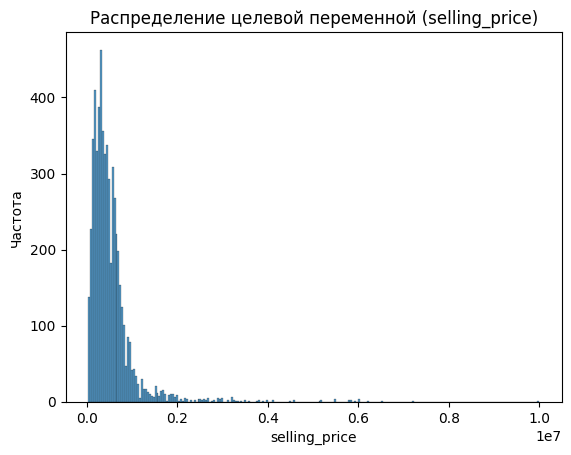

In [106]:
sns.histplot(df_train['selling_price'])
plt.title('Распределение целевой переменной (selling_price)')
plt.xlabel('selling_price')
plt.ylabel('Частота')
plt.show()

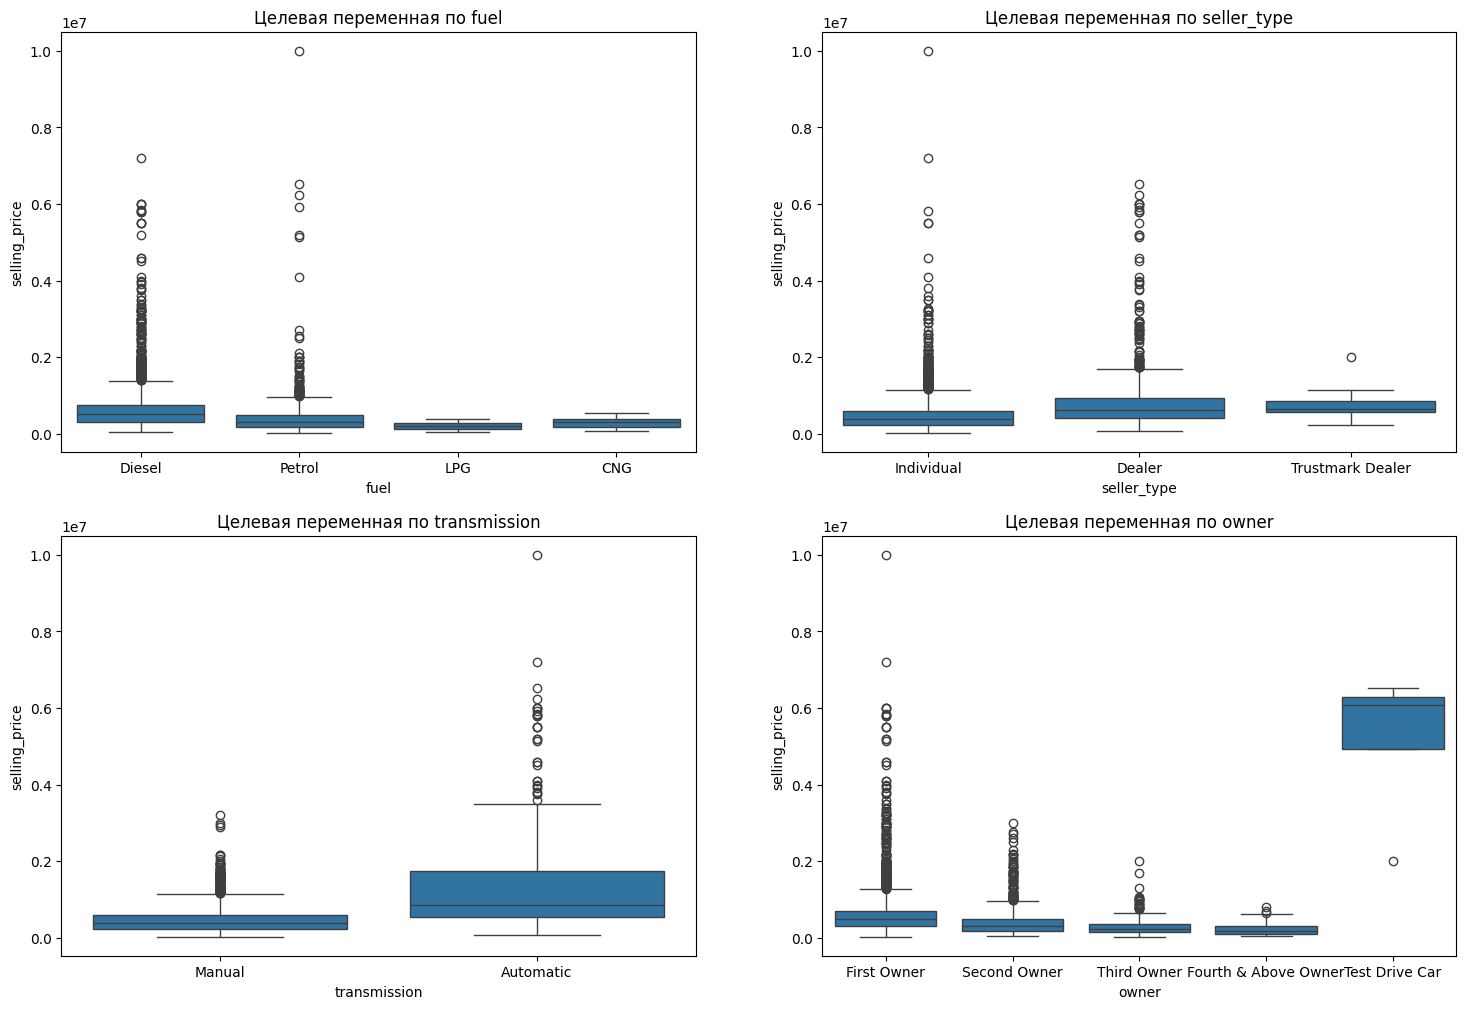

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, feature in enumerate(['fuel', 'seller_type', 'transmission', 'owner']):
    row = i // 2
    col = i % 2
    sns.boxplot(x=feature, y='selling_price', data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f'Целевая переменная по {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('selling_price')

- Поясните
  - `Визуализация целевой переменной поможет посмотреть распределены цены - наличие выборосов, перекосов и пр. Как видно из графика, есть совсем немного дорогих машин, а подавляющее большинство лежит ниже ценника в 2e6`
  - `Также полезно посмотреть на нее в разрезе нескольких категориальных фичей - так можно понять, например, что машины с автоматической трансмиссией дороже продаются, есть машины из тест драйва, которые тоже стоят дорого и пр.`

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [108]:
df_train_num = df_train[numerical_features].copy(deep=True)
df_test_num = df_test[numerical_features].copy(deep=True)

In [109]:
y_train = df_train_num[target_col]
X_train = df_train_num.drop(columns=target_col)

In [110]:
assert X_train.shape == (5840, 6)

In [111]:
y_test = df_test_num[target_col]
X_test = df_test_num.drop(columns=target_col)

In [112]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def check(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = MSE(y_train, y_train_pred)
  train_r2 = r2_score(y_train, y_train_pred)

  test_mse = MSE(y_test, y_test_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"Train MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
  print(f"Test MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

def train_and_check(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  check(model, X_train, y_train, X_test, y_test)
  return model

In [114]:
model_linreg_plain = train_and_check(LinearRegression(), X_train, y_train, X_test, y_test)

Train MSE: 117089411804.9041, R2: 0.5915
Test MSE: 233550462870.9787, R2: 0.5937


- Сделайте выводы по значениям метрик качества.
  - `Наша модель объясняет ~59% дисперсии selling_price - модель не очень сильная, а высокий MSE говорит о большой неточности в прогнозах. Но зато она не переобучена, т.к. показывает схожие результаты по R^2 на трейне и на тесте. Тем не менее, ошибка на тесте выше.`

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_linreg_scaled = train_and_check(LinearRegression(), X_train_scaled, y_train, X_test_scaled, y_test)

Train MSE: 117089411804.9042, R2: 0.5915
Test MSE: 233550462870.9736, R2: 0.5937


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [116]:
pd.DataFrame({
    'feature': X_test.columns,
    'coef_abs': abs(model_linreg_scaled.coef_)
}).sort_values(
    by='coef_abs',
    ascending=False,
)

,feature,coef_abs
4,max_power,322550.418548
0,year,152483.653299
3,engine,60668.514710
1,km_driven,44289.071324
2,mileage,28431.237772
5,seats,22522.337180


- Какой признак оказался наиболее информативным в предсказании цены?
  - `max_power`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [117]:
from sklearn.linear_model import Lasso

model_lasso_plain = train_and_check(Lasso(), X_train, y_train, X_test, y_test)

Train MSE: 117089411807.1792, R2: 0.5915
Test MSE: 233550622979.8798, R2: 0.5937


- Оцените её качество
  - `MSE на тесте стал хуже`

In [118]:
pd.DataFrame({
    'feature': X_test.columns,
    'coef': model_lasso_plain.coef_,
}).sort_values(
    by='coef',
    ascending=False,
)

,feature,coef
0,year,37233.936697
4,max_power,10188.719755
2,mileage,7133.371225
3,engine,124.925834
1,km_driven,-0.737343
5,seats,-22926.913485


- Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса?
  - `Не занулила, но была невероятно близка к этому. Наверняка потому что есть кореллирующие признаки.`

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [119]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.logspace(-2, 4, 50)
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid={'alpha': alphas},
    cv=10,
)

grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model_lasso = grid_search.best_estimator_

In [120]:
check(best_model_lasso, X_train, y_train, X_test, y_test)

Train MSE: 117089411804.9045, R2: 0.5915
Test MSE: 233550464471.6792, R2: 0.5937


In [121]:
print(f"Количество обученных моделей: {len(alphas) * grid_search.cv}")
print(f"Лучший коэффициент регуляризации: {best_alpha}")

Количество обученных моделей: 500
Лучший коэффициент регуляризации: 0.01


In [122]:
pd.DataFrame({
    'feature': X_test.columns,
    'coef': best_model_lasso.coef_,
}).sort_values(
    by='coef',
    ascending=False,
)

,feature,coef
0,year,37234.077347
4,max_power,10188.692566
2,mileage,7133.338438
3,engine,124.929656
1,km_driven,-0.737340
5,seats,-22929.081208


- Сколько грид-сёрчу пришлось обучать моделей?
  - `500`
- Какой коэффициент регуляризации у лучшей из перебранных моделей?
  - `0.01 (10^-2, нижняя граница)`
- Занулились ли какие-нибудь из весов при такой регуляризации?
  - `Нет, но km_driven близок к обнулению`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [123]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(max_iter=20000)
alphas = np.logspace(-2, 3, 20)
l1s = np.linspace(0 + 0.05, 1, 20)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid={
        'alpha': alphas,
        'l1_ratio': l1s,
    },
    cv=10,
)

grid_search.fit(X_train, y_train)
best_model_elastic = grid_search.best_estimator_

In [124]:
print(f"Количество обученных моделей: {len(alphas) * len(l1s) * grid_search.cv}")
print(f"Лучшие параметры: {grid_search.best_params_}")

Количество обученных моделей: 4000
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 1.0}


In [125]:
check(best_model_elastic, X_train, y_train, X_test, y_test)

Train MSE: 117089411804.9045, R2: 0.5915
Test MSE: 233550464471.6792, R2: 0.5937


 - Сколько грид-сёрчу пришлось обучать моделей?
  - `4000`
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
  - `alpha = 0.01, l1_ratio = 1`

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [126]:
class FeatureBinarySplitter(BaseEstimator, TransformerMixin):
  def __init__(self, from_col: str, into_col_1: str, into_col_2: str):
    self.medians = {}
    self.from_col = from_col
    self.into_col_1 = into_col_1
    self.into_col_2 = into_col_2

  def fit(self, X, y = None):
    pass

  def transform(self, X):
    X[[self.into_col_1, self.into_col_2]] = X[self.from_col].str.split(n=1, expand=True)
    X.drop([self.from_col], axis=1, inplace=True)
    return X

In [127]:
df_train_cat = df_train.copy(deep=True)
df_test_cat = df_test.copy(deep=True)

In [128]:
# Разделим имя на бренд и модель - категориальные признаки
splitter = FeatureBinarySplitter("name", "brand", "model")
df_train_cat = splitter.transform(df_train_cat)
df_test_cat = splitter.transform(df_test_cat)

In [129]:
df_train_cat[['brand', 'model']].value_counts()

brand     model                           
Maruti    Swift Dzire VDI                     91
          Alto 800 LXI                        58
          Alto LXi                            56
          Swift VDI                           48
          Swift VDI BSIV                      47
                                              ..
Mahindra  KUV 100 mFALCON G80 K8 5str AW       1
          KUV 100 mFALCON G80 K6 AW            1
          KUV 100 mFALCON G80 K4 Plus 5str     1
          KUV 100 mFALCON G80 K4               1
Volvo     XC90 T8 Excellence BSIV              1
Name: count, Length: 1924, dtype: int64

In [130]:
model_remover = ColumnRemover(["model"])
df_train_cat = model_remover.transform(df_train_cat)
df_test_cat = model_remover.transform(df_test_cat)

In [131]:
y_train_cat = df_train_cat[target_col]
X_train_cat = df_train_cat.drop([target_col], axis=1)
y_test_cat = df_test_cat[target_col]
X_test_cat = df_test_cat.drop([target_col], axis=1)

In [132]:
# (5840, 10) -> (5840, 11) из-за brand
assert X_train_cat.shape == (5840, 11)

In [133]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe_raw_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", drop='first', sparse_output=False)
ct = make_column_transformer(
    (one_hot_encoder, ohe_raw_cols),
    remainder='passthrough',
)

In [135]:
ct.fit(X_train_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner', 'seats', 'brand'])])

In [136]:
X_train_cat = ct.transform(X_train_cat)
X_test_cat = ct.transform(X_test_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [137]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alphas = np.logspace(-3, 3, 10)
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': alphas},
    scoring='r2',
    cv=10,
)

grid_search.fit(X_train_cat, y_train_cat)
best_model_cat_ridge = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.01481e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.05757e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.10841e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [138]:
check(best_model_cat_ridge, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

Train MSE: 67144524090.0449, R2: 0.7658
Test MSE: 130161907836.0619, R2: 0.7736


- Удалось ли улучшить качество прогнозов?
  - `Удалось значительно. Можно и далее улучшать с помощью фича-инжиниринга и учета доп. данных таких как torque`

Сохраним нашу лучшую модель категориального Ridge

In [150]:
from pickle import dump

with open("best_model_cat_ridge.pkl", "wb") as f:
  dump(best_model_cat_ridge, f, protocol=5)

А также ПОЛНЫЙ пайплайн подготовки данных ("cat" - с категориями)

In [140]:
from sklearn.pipeline import Pipeline

full_pipeline_cat = Pipeline(
    [
      ('value_unit_extractor', value_unit_extractor),
      ('int_feature_extractor', int_feature_extractor),
      ('torque_remover', torque_remover),
      ('splitter', splitter),
      ('model_remover', model_remover),
      ('one hot encoder', ct),
    ]
)

In [148]:
full_pipeline_cat

Pipeline(steps=[('value_unit_extractor',
                 ValueFromValueUnitExtractor(raw_cols=['mileage', 'engine',
                                                       'max_power'])),
                ('int_feature_extractor',
                 IntFeatureExtractor(raw_cols=['engine', 'seats'])),
                ('torque_remover', ColumnRemover(column_names=['torque'])),
                ('splitter',
                 FeatureBinarySplitter(from_col='name', into_col_1='brand',
                                       into_col_2='model')),
                ('model_remover', ColumnRemover(column_names=['model'])),
                ('one hot encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'seats', 'brand'])]))])

In [151]:
with open("full_pipeline_cat.pkl", "wb") as f:
  dump(full_pipeline_cat, f, protocol=5)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [143]:
def business_metric(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred) <= 0.1 * y_true) / len(y_true)

models = {
    'Ridge (Best)': (best_model_cat_ridge, X_test_cat, y_test_cat),
    'Ridge (Default)': (Ridge().fit(X_train_cat, y_train_cat), X_test_cat, y_test_cat),
    'ElasticNet (Best)': (best_model_elastic, X_test, y_test),
    'ElasticNet (Default)': (ElasticNet().fit(X_train, y_train), X_test, y_test),
    'Lasso (Best)': (best_model_lasso,  X_test, y_test),
    'Lasso (Best)': (Lasso().fit(X_train, y_train), X_test, y_test),
    'Linreg (Scaled)': (model_linreg_scaled, X_test_scaled, y_test),
    'Linreg (Default)': (model_linreg_plain, X_test, y_test),
}

best_model_name = None
best_metric_value = -np.inf
for name, (model, X_ts, y_ts) in models.items():
  business_metric_value = business_metric(y_ts, model.predict(X_ts))
  print(f"{name} ({model}): {business_metric_value}")
  if business_metric_value > best_metric_value:
    best_metric_value = business_metric_value
    best_model_name = name

print()
print('Best model', best_model_name)
print('Best business metric value', best_metric_value)

Ridge (Best) (Ridge(alpha=2.154434690031882)): 0.304
Ridge (Default) (Ridge()): 0.311
ElasticNet (Best) (ElasticNet(alpha=0.01, l1_ratio=1.0, max_iter=20000)): 0.225
ElasticNet (Default) (ElasticNet()): 0.232
Lasso (Best) (Lasso()): 0.225
Linreg (Scaled) (LinearRegression()): 0.225
Linreg (Default) (LinearRegression()): 0.225

Best model Ridge (Default)
Best business metric value 0.311


- Какая лучше всего решает задачу бизнеса?
  - `Дефолтный Rige`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [144]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

